In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df.shape

(9742, 3)

In [4]:
df1=pd.read_csv('ratings.csv')
df1.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df1.shape

(100836, 4)

In [6]:
unique_user_ids = df1['userId'].nunique()

print("Number of unique userId values:",unique_user_ids)

Number of unique userId values: 610


In [7]:
ratings_count = df1.groupby('movieId').size()

maximum_rating_movie = ratings_count.idxmax()

max_rated_movie_title = df[df['movieId'] == maximum_rating_movie]['title'].values[0]

print("Movie with the maximum number of ratings:",max_rated_movie_title)

Movie with the maximum number of ratings: Forrest Gump (1994)


In [8]:
df2=pd.read_csv('tags.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
matrix_movie_id = df[df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

matrix_tags = df2[df2['movieId'] == matrix_movie_id]['tag'].unique()

print("Tags for 'Matrix, The (1999)':")
for tag in matrix_tags:
    print(tag)

Tags for 'Matrix, The (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


In [10]:
movie_id = df[df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter ratings for this movie and calculate the average
average_rating = df1[df1['movieId'] == movie_id]['rating'].mean()

print("Average rating for 'Terminator 2: Judgment Day (1991)':",average_rating)

Average rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


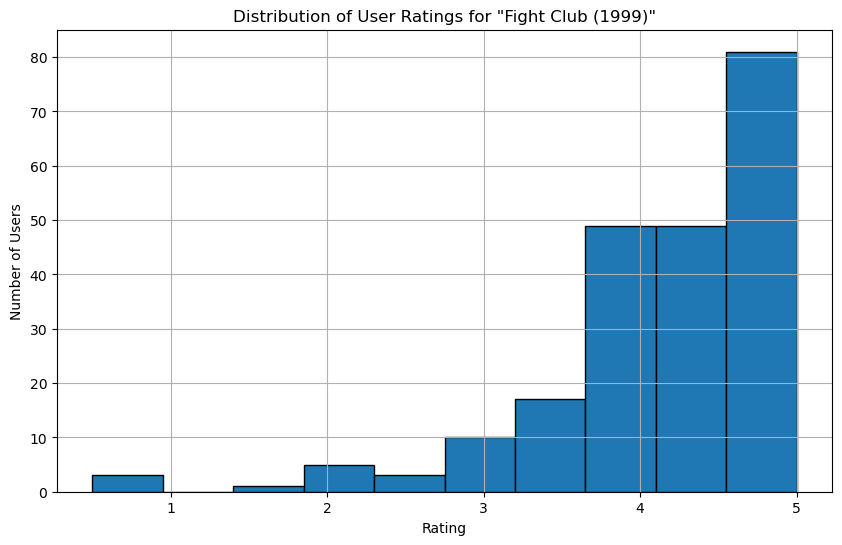

In [11]:
fight_club_movie_id = df[df['title'] == 'Fight Club (1999)']['movieId'].values[0]

fight_club_ratings =df1[df1['movieId'] == fight_club_movie_id]['rating']

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()


In [12]:
# Step 1: Group by movieId and apply aggregation operations (count and mean)
grouped_ratings = df1.groupby('movieId').agg(count=('rating', 'count'),mean=('rating', 'mean')).reset_index()

# Step 2: Inner join with movies_df to get movie titles
merged_df = pd.merge(df, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter movies that have more than 50 user ratings
filtered_df = merged_df[merged_df['count'] > 50]

# Display the filtered DataFrame
print(filtered_df)


      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  count      mean  
0     Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                      Adventure|Children|Fantasy    110  3.431818  
2                                  Comedy|Romance     52  3.259615  
5                           Action|Crime|Thriller    102  3.946078  
6                                  Comedy|

In [13]:
most_popular_movie = filtered_df.loc[filtered_df['mean'].idxmax()]

In [14]:
most_popular_movie

movieId                                 318
title      Shawshank Redemption, The (1994)
genres                          Crime|Drama
count                                   317
mean                               4.429022
Name: 277, dtype: object

In [15]:
top_5_popular_movies = filtered_df.sort_values(by='count', ascending=False).head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top_5_popular_movies[['title', 'count', 'mean']])

Top 5 popular movies based on number of user ratings:
                                 title  count      mean
314                Forrest Gump (1994)    329  4.164134
277   Shawshank Redemption, The (1994)    317  4.429022
257                Pulp Fiction (1994)    307  4.197068
510   Silence of the Lambs, The (1991)    279  4.161290
1938                Matrix, The (1999)    278  4.192446


In [16]:
sci_fi_movies_df = filtered_df[filtered_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

sci_fi_movies_sorted = sci_fi_movies_df.sort_values(by='count', ascending=False)

third_most_popular_sci_fi_movie = sci_fi_movies_sorted.iloc[2]  

print(third_most_popular_sci_fi_movie)

movieId                                 480
title                  Jurassic Park (1993)
genres     Action|Adventure|Sci-Fi|Thriller
count                                   238
mean                                   3.75
Name: 418, dtype: object


In [17]:
from bs4 import BeautifulSoup
import requests
df3 = pd.read_csv('links.csv')

movies_with_imdb = pd.merge(filtered_df, df3, on='movieId', how='inner')

# Step 5: Function to scrape IMDb reviews
def scrape_imdb_reviews(imdb_id):
    reviews = []
    url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        review_elements = soup.find_all('div', class_='text show-more__control')
        for element in review_elements:
            reviews.append(element.get_text())
    return reviews


movies_with_reviews = {}
for _, row in movies_with_imdb.iterrows():
    imdb_id = row['imdbId']
    title = row['title']
    reviews = scrape_imdb_reviews(imdb_id)
    movies_with_reviews[title] = reviews

for title, reviews in movies_with_reviews.items():
    print(f"Title: {title}, Reviews: {len(reviews)}")


Title: Toy Story (1995), Reviews: 0
Title: Jumanji (1995), Reviews: 0
Title: Grumpier Old Men (1995), Reviews: 0
Title: Heat (1995), Reviews: 0
Title: Sabrina (1995), Reviews: 0
Title: GoldenEye (1995), Reviews: 0
Title: American President, The (1995), Reviews: 0
Title: Casino (1995), Reviews: 0
Title: Sense and Sensibility (1995), Reviews: 0
Title: Ace Ventura: When Nature Calls (1995), Reviews: 0
Title: Get Shorty (1995), Reviews: 0
Title: Leaving Las Vegas (1995), Reviews: 0
Title: Twelve Monkeys (a.k.a. 12 Monkeys) (1995), Reviews: 0
Title: Babe (1995), Reviews: 0
Title: Dead Man Walking (1995), Reviews: 0
Title: Clueless (1995), Reviews: 0
Title: Seven (a.k.a. Se7en) (1995), Reviews: 0
Title: Pocahontas (1995), Reviews: 0
Title: Usual Suspects, The (1995), Reviews: 0
Title: Mr. Holland's Opus (1995), Reviews: 0
Title: From Dusk Till Dawn (1996), Reviews: 0
Title: Broken Arrow (1996), Reviews: 0
Title: Happy Gilmore (1996), Reviews: 0
Title: Braveheart (1995), Reviews: 0
Title: Tax

In [18]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8', 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan


In [19]:
def get_imdb_rating(imdbId):
    id_str = str(int(imdbId))
    n_zeroes = 7 - len(id_str)
    formatted_id = "0" * n_zeroes + id_str
    url = f"https://www.imdb.com/title/tt{formatted_id}/"
    
    headers = {
        'Content-Type': 'text/html; charset=UTF-8', 
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    
    return float(imdb_rating.text) if imdb_rating else np.nan

# Add a new column for IMDb ratings
df['imdbRating'] = df['imdbId'].apply(get_imdb_rating)

# Find the movieId with the highest IMDb rating
max_rating_movie = df.loc[movies_df['imdbRating'].idxmax()]

# Output the movieId
print(f"The movieId with the highest IMDb rating is: {max_rating_movie['movieId']}")

KeyError: 'imdbId'

In [20]:
import pandas as pd

# Load the links.csv file
df3 = pd.read_csv('links.csv')

# Assuming filtered_df contains your filtered movies
movies_with_imdb = pd.merge(filtered_df, df3, on='movieId', how='inner')


In [21]:
df3.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [22]:
from bs4 import BeautifulSoup
import requests
import numpy as np

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan


In [23]:
# Add a new column for IMDb ratings
movies_with_imdb['imdbRating'] = movies_with_imdb['imdbId'].apply(scrapper)

# Find the movieId with the highest IMDb rating
max_rating_movie = movies_with_imdb.loc[movies_with_imdb['imdbRating'].idxmax()]

# Output the movieId
print(f"The movieId with the highest IMDb rating is: {max_rating_movie['movieId']}")

KeyError: nan

In [24]:
# Apply the scrapper to get IMDb ratings
movies_with_imdb['imdbRating'] = movies_with_imdb['imdbId'].apply(scrapper)

# Drop rows with NaN values in the imdbRating column
movies_with_imdb = movies_with_imdb.dropna(subset=['imdbRating'])

# Convert imdbRating to numeric (in case it's still in string format)
movies_with_imdb['imdbRating'] = pd.to_numeric(movies_with_imdb['imdbRating'], errors='coerce')

# Again, drop rows with NaN values in the imdbRating column (in case conversion created any)
movies_with_imdb = movies_with_imdb.dropna(subset=['imdbRating'])

# Find the movieId with the highest IMDb rating
max_rating_movie = movies_with_imdb.loc[movies_with_imdb['imdbRating'].idxmax()]

# Output the movieId
print(f"The movieId with the highest IMDb rating is: {max_rating_movie['movieId']}")


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [25]:

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    
    print(f"Scraping URL: {URL}")  # Debugging output
    
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    response = requests.get(URL, headers=request_header)
    
    if response.status_code != 200:
        print(f"Failed to retrieve {URL}, status code: {response.status_code}")
        return np.nan
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    imdb_rating = soup.find('span', attrs={'class': 'sc-eb51e184-1 ljxVSS'})
    
    if imdb_rating:
        return imdb_rating.text
    else:
        print(f"Could not find rating for {URL}")
        return np.nan


In [26]:
# Apply the scrapper to get IMDb ratings
movies_with_imdb['imdbRating'] = movies_with_imdb['imdbId'].apply(scrapper)

# Drop rows with NaN values in the imdbRating column
movies_with_imdb = movies_with_imdb.dropna(subset=['imdbRating'])

# Convert imdbRating to numeric (in case it's still in string format)
movies_with_imdb['imdbRating'] = pd.to_numeric(movies_with_imdb['imdbRating'], errors='coerce')

# Again, drop rows with NaN values in the imdbRating column (in case conversion created any)
movies_with_imdb = movies_with_imdb.dropna(subset=['imdbRating'])

# Find the movieId with the highest IMDb rating
max_rating_movie = movies_with_imdb.loc[movies_with_imdb['imdbRating'].idxmax()]

# Output the movieId
print(f"The movieId with the highest IMDb rating is: {max_rating_movie['movieId']}")

Scraping URL: https://www.imdb.com/title/tt0114709/
Scraping URL: https://www.imdb.com/title/tt0113497/
Scraping URL: https://www.imdb.com/title/tt0113228/
Scraping URL: https://www.imdb.com/title/tt0113277/
Scraping URL: https://www.imdb.com/title/tt0114319/
Scraping URL: https://www.imdb.com/title/tt0113189/
Scraping URL: https://www.imdb.com/title/tt0112346/
Scraping URL: https://www.imdb.com/title/tt0112641/
Scraping URL: https://www.imdb.com/title/tt0114388/
Scraping URL: https://www.imdb.com/title/tt0112281/
Scraping URL: https://www.imdb.com/title/tt0113161/
Scraping URL: https://www.imdb.com/title/tt0113627/
Scraping URL: https://www.imdb.com/title/tt0114746/
Scraping URL: https://www.imdb.com/title/tt0112431/
Scraping URL: https://www.imdb.com/title/tt0112818/
Scraping URL: https://www.imdb.com/title/tt0112697/
Scraping URL: https://www.imdb.com/title/tt0114369/
Scraping URL: https://www.imdb.com/title/tt0114148/
Scraping URL: https://www.imdb.com/title/tt0114814/
Scraping URL